In [1]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
mnist = keras.datasets.mnist

c:\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.3526 - acc: 0.8993
Epoch 2/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.1475 - acc: 0.9553
Epoch 3/5
60000/60000 [==============================] - 13s 219us

In [3]:
result = model.evaluate(x_train, y_train)
print("Train loss: %.2f Accuracy: %.4f" % (result[0], result[1]))
result = model.evaluate(x_test, y_test)
print("Test loss: %.2f Accuracy: %.4f" % (result[0], result[1]))

60000/60000 [==============================] - 3s 51us/step
Train loss: 0.04 Accuracy: 0.9888
10000/10000 [==============================] - 0s 49us/step
Test loss: 0.07 Accuracy: 0.9772


In [4]:
x_train, x_test = x_train.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)
cnn = Sequential()
cnn.add(Conv2D(32, [5, 5], input_shape=(28, 28, 1)))
cnn.add(Conv2D(64, [3, 3]))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, [3, 3]))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, [3, 3]))
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.summary()
cnn.fit(x_train, y_train, epochs=5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
__________

In [5]:
result = cnn.evaluate(x_train, y_train)
print("Train loss: %.2f Accuracy: %.4f" % (result[0], result[1]))
result = cnn.evaluate(x_test, y_test)
print("Test loss: %.2f Accuracy: %.4f" % (result[0], result[1]))

60000/60000 [==============================] - 37s 623us/step
Train loss: 0.05 Accuracy: 0.9849
10000/10000 [==============================] - 7s 660us/step
Test loss: 0.08 Accuracy: 0.9763


In [6]:
import matplotlib.pyplot as plt 

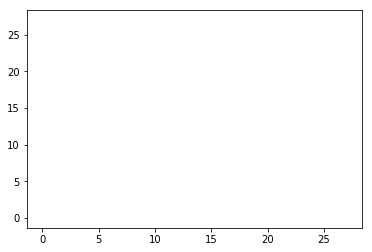

In [7]:
import numpy as np
plt.scatter(np.arange(28), np.arange(28), x_test[0].reshape(-1))